# Содержание

[Введение. Исследование компьютерных игр в интернет-магазине](#1)

[1 Откроем файл с данными и изучим общую информацию.](#2)

[2 Выполним предобработку данных.](#3)

[3 Проведем исследовательский анализ данных](#4)

[4 Составим портрет пользователя каждого региона](#5)

[5 Проверим гипотезы](#6)

[6 Общий вывод](#7)

<a id=1></a>
# Введение. Исследование компьютерных игр в интернет-магазине

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:**

1. Проведсти исследовательский анализ данных, приведенных в таблице.

2. Составить портрет пользователя каждого региона.

3. Проверить гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

4. Проверить гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

**Ход исследования:**

Данные для исследования я получу из файла — `games.csv`.

*Описание данных:*

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

О качестве данных пока ничего не известно, поэтому перед началом работы понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. При необходимости создам необходимые столбцы и приступлю к исследовательскому анализу.

Таким образом, моё исследование пройдет в несколько этапов:

1. Обзор данных.

2. Предобработка данных.

3. Расчеты и добавление новых столбцов в таблицу (при необходимости).

4. Изучение и описание параметров таблицы:

- Посмотрим, сколько игр выпускалось в разные годы.

- Посмотрим, как менялись продажи по платформам.

- Какие платформы лидируют по продажам, растут или падают?

- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

- Соотнесем выводы с продажами игр на других платформах.

- Посмотрим на общее распределение игр по жанрам.

5. Составим портрет пользователя каждого региона.

6. Проверим гипотезы.

<a id=2></a>
### Откроем файл с данными и изучим общую информацию. 

#### Считаем данные из csv-файла и сохраним в переменную.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

#### Выведем первые 20 строчек и общую информацию датафрейма `df` на экран.

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Для просмотра статистической сводки каждого столбца, чтобы узнать распределение данных в каждом столбце используем метод *describe()*

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Построим гистограммы для всех числовых столбцов.

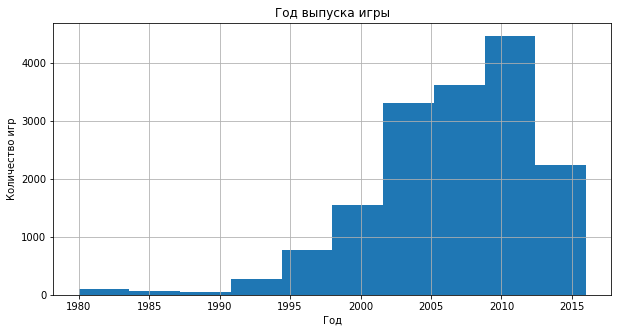

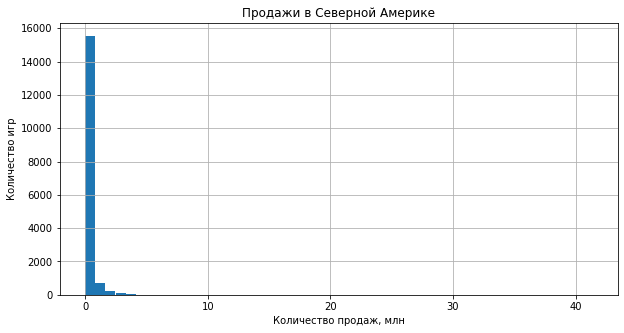

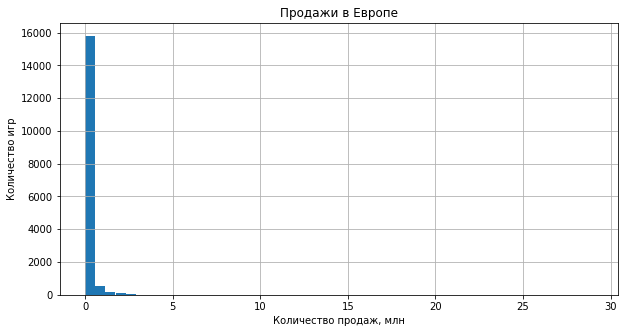

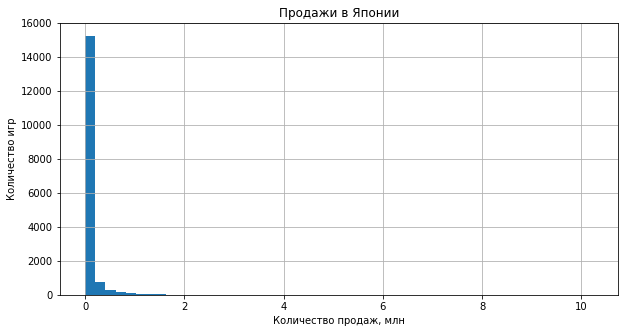

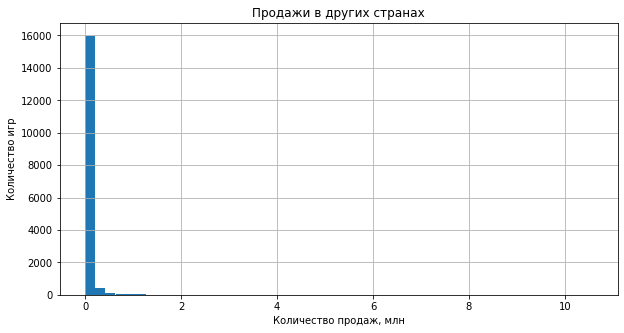

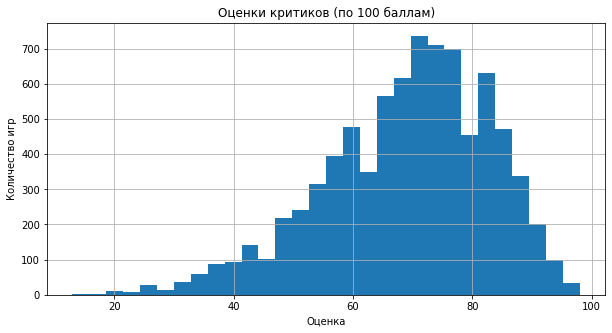

In [6]:
df.hist('Year_of_Release', bins=10, figsize=(10, 5))
plt.title('Год выпуска игры')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()
df.hist('NA_sales', bins=50, figsize=(10, 5))
plt.title('Продажи в Северной Америке')
plt.xlabel('Количество продаж, млн')
plt.ylabel('Количество игр')
plt.show()
df.hist('EU_sales', bins=50, figsize=(10, 5))
plt.title('Продажи в Европе')
plt.xlabel('Количество продаж, млн')
plt.ylabel('Количество игр')
plt.show()
df.hist('JP_sales', bins=50, figsize=(10, 5))
plt.title('Продажи в Японии')
plt.xlabel('Количество продаж, млн')
plt.ylabel('Количество игр')
plt.show()
df.hist('Other_sales', bins=50, figsize=(10, 5))
plt.title('Продажи в других странах')
plt.xlabel('Количество продаж, млн')
plt.ylabel('Количество игр')
plt.show()
df.hist('Critic_Score', bins=30, figsize=(10, 5))
plt.title('Оценки критиков (по 100 баллам)')
plt.xlabel('Оценка')
plt.ylabel('Количество игр')
plt.show()

**По гистограммам видно, что в столбцах с продажами скорее всего имеются "выбросы", которые могут искажать средние значения при исследовании.**

**Вывод, исходя из общих данных датафрейма `df`:**
1. в некоторых столбцах имеются пропуски данных (надо изучить характер данных пропусков и решить - удалить данные строки или откорректировать);
2. некорректное отображение некоторых данных в таблице (верхние регистры названий столбцов);
3. необходимо будет проверить наличие дубликатов;
4. по статистической сводке и по гистограммам виден разброс данных в некоторых столбцах, необходимо проверить их на наличие "выбросов" (особенно в столбцах с продажами по регионам) и откорректировать при необходимости.

<a id=3></a>
### Выполним предобработку данных

#### Заменим названия столбцов (приведем все названия столбцов к нижнему регистру).

In [7]:
df.columns = df.columns.str.lower()

#### Приведем значения столбцов `name`, `platform`, `genre` и `rating` также к нижнему регистру.

In [8]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df['rating'] = df['rating'].str.lower()

#### Проверим количество пропусков в таблице `df`.

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Видим по 2 пропуска в столбцах `name` и `genre`. Проверим в одних и тех же строчках ли эти пропуски.**

In [10]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Видим, что пропуски в одних и тех же строчках, поэтому удалим их.**

In [11]:
df = df.dropna(subset=['name']).reset_index(drop=True)

**Количество пропусков в таблице в процентах:**

In [12]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


**`year_of_release` - имеет 2% пропусков (мало, чтобы как то повлиять на анализ) - нет данных для заполнения данных пропусков, поэтому тоже их удалим.**

In [13]:
df = df.dropna(subset=['year_of_release'])

**Проверим значения в столбце `user_score`.**

In [14]:
df['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

**Аббревиатура *tbd* означает *to be defined* - предстоит определить, то есть на данный момент это пропуск в данных. Заменим их на *nan*.**

In [15]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

**Так как в столбце `user_score` много пропусков, но есть остальные значения, удалить пропуски не получится. В таком случае заменим пропуски на значение-заглушку. Значение-заглушку выберем (-1), так как в списке уже есть оценка 0.**

In [16]:
df['user_score'] = df['user_score'].fillna(-1)

**Проверим значения в столбце `critic_score`.**

In [17]:
df['critic_score'].sort_values(ascending=False).unique()

array([98., 97., 96., 95., 94., 93., 92., 91., 90., 89., 88., 87., 86.,
       85., 84., 83., 82., 81., 80., 79., 78., 77., 76., 75., 74., 73.,
       72., 71., 70., 69., 68., 67., 66., 65., 64., 63., 62., 61., 60.,
       59., 58., 57., 56., 55., 54., 53., 52., 51., 50., 49., 48., 47.,
       46., 45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34.,
       33., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 21., 20.,
       19., 17., 13., nan])

**Так как в столбце `critic_score` много пропусков, но есть остальные значения, удалить пропуски не получится. В таком случае заменим пропуски на значение-заглушку (0).**

In [18]:
df['critic_score'] = df['critic_score'].fillna(0)

**Рассмотрим столбец `rating`.**

In [19]:
df['rating'].sort_values(ascending=False).unique()

array(['t', 'rp', 'm', 'k-a', 'ec', 'e10+', 'e', 'ao', nan], dtype=object)

**Значения рейтинга по Entertainment Software Rating Board (ESRB):**

1. `ec («Early childhood»)` — «Для детей младшего возраста».

2. `e («Everyone»)` — «Для всех». Первоначально был "K-A" ("Kids to Adults").

3. `e10+ («Everyone 10 and older»)` — «Для всех от 10 лет и старше».

4. `t («Teen»)` — «Подросткам»: Игра подходит для лиц от 13 лет.

5. `m («Mature»)` — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.

6. `ao («Adults Only 18+»)` — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

7. `rp («Rating Pending»)` — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

**Пропуски в рейтинге ESRB заменим на *indefined* - не определен. Устаревшую аббревиатуру "k-a" заменим на современное обозначение "e".**

In [20]:
df['rating'] = df['rating'].fillna(value='indefined')
df['rating'] = df['rating'].replace('k-a', 'e')

**Удостоверимся, что пропусков больше нет.**

In [21]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Преобразуем типы данных в столбцах *year_of_release* и *critic_score*  на int;  *user_score* -  на float. 

In [22]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)
df['critic_score'] = df['critic_score'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


#### Проверим наличие дубликатов в таблице по всем столбцам.

In [24]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


#### Проверим наличие дубликатов в столбцах `name`,	`platform`,	`year_of_release`,	`genre`.

In [25]:
duplicate_rows = df[df.duplicated(['name', 'platform', 'year_of_release', 'genre'])]
duplicate_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16228,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83,5.5,e


In [26]:
df.query('name == "madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,x360,2012,sports,2.53,0.15,0.0,0.17,81,5.8,e
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,e
3985,madden nfl 13,wii,2012,sports,0.47,0.00,0.0,0.03,0,7.3,e
5886,madden nfl 13,psv,2012,sports,0.28,0.00,0.0,0.02,63,7.3,e
7065,madden nfl 13,wiiu,2012,sports,0.21,0.00,0.0,0.02,75,6.7,e
16228,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,e


**Видим, что в строках 604 и 16228 абсолютно идентичные игры, но если в строке 604 данные заполнены более полно, то в строке 16228 в столбцах с продажами одни нули. Удалим эту строчку.**

In [27]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'])

In [28]:
df.query('name == "madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,x360,2012,sports,2.53,0.15,0.0,0.17,81,5.8,e
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,e
3985,madden nfl 13,wii,2012,sports,0.47,0.00,0.0,0.03,0,7.3,e
5886,madden nfl 13,psv,2012,sports,0.28,0.00,0.0,0.02,63,7.3,e
7065,madden nfl 13,wiiu,2012,sports,0.21,0.00,0.0,0.02,75,6.7,e


#### Добавим новый столбец `sum_sales` - суммарные продажи во всех регионах.

In [29]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [30]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0,-1.0,indefined,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0,-1.0,indefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,0,-1.0,indefined,0.01
16709,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,0,-1.0,indefined,0.01
16710,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,0,-1.0,indefined,0.01
16711,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,0,-1.0,indefined,0.01


**Вывод по предобработке данных:**

1. Все значения столбцов были приведены к нижнему регистру.

2. Были удалены или заменены на значение-заглушку пропуски в данных. Пропуски в данных могли появиться из-за некорректной выгрузки данных или в следствие ошибок при заполнении таблицы.

3. Для удобства дальнейшего исследования были преобразованы типы данных.

4. Таблицу проверили на наличие полных дубликатов - их нет. Но нашли один неявный дубликат и удалили.

5. В таблицу добавили новый столбец - суммарные продажи во всех регионах.

**В целом данные в хорошем качестве, таблица готова к дальнейшему исследованию.**

<a id=4></a>
### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

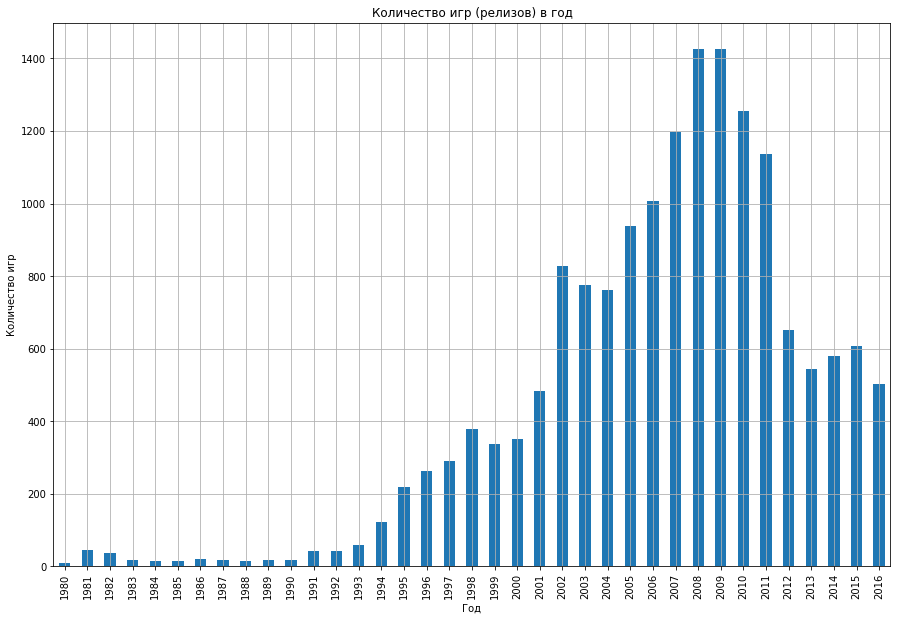

In [31]:
game_in_years = df.groupby('year_of_release')['year_of_release'].count().plot(
    x='year_of_release', 
    kind='bar', 
    figsize=(15, 10), 
    grid=True,
    title = 'Количество игр (релизов) в год'
)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

**По графику видно, что начиная с 1994 года начинается рост продаж компьютерных игр. Пик продаж пришелся на 2008 и 2009 года. Посмотрим как менялись количества проданных копий игр за эти же года.**

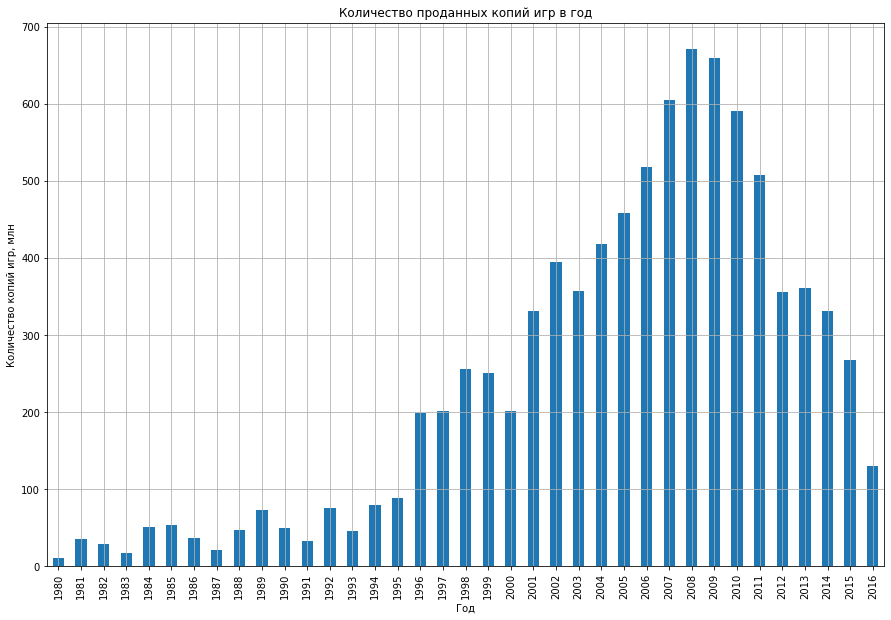

In [32]:
sum_sales_in_years = df.groupby('year_of_release')['sum_sales'].sum().plot(
    x='year_of_release', 
    kind='bar', 
    figsize=(15, 10), 
    grid=True,
    title = 'Количество проданных копий игр в год'
)
plt.xlabel('Год')
plt.ylabel('Количество копий игр, млн')
plt.show()

**Видим, что в 1996 году произошел скачок по продажам игр более чем в 2 раза, по сравнению с 1995 годом. Пик также пришелся на 2008 и 2009 года.**

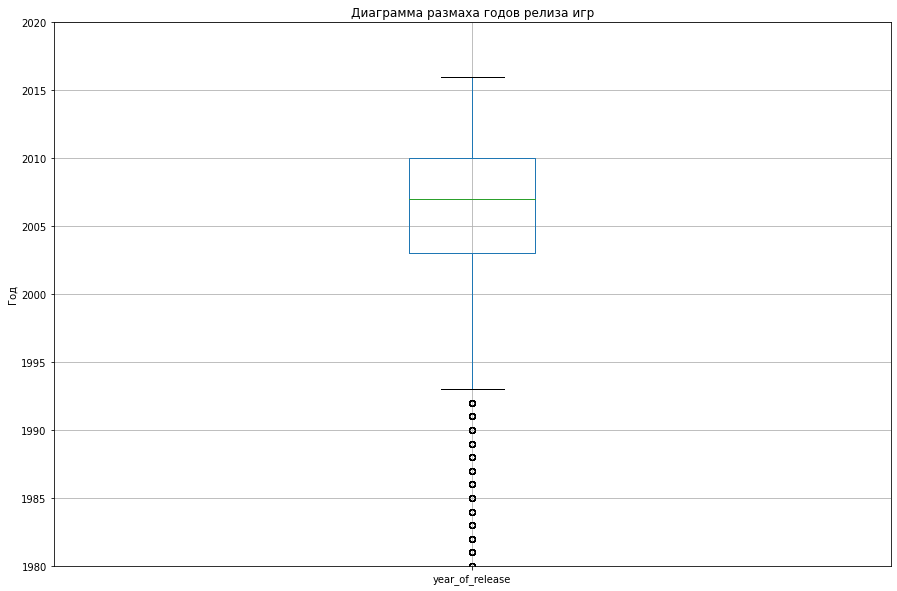

In [33]:
plt.figure(figsize=(15,10))
df.boxplot(column=['year_of_release'])
plt.ylim(1980, 2020)
plt.title('Диаграмма размаха годов релиза игр')
plt.ylabel('Год')
plt.show()

**Видно, что до 1994 года релизов игр было мало (менее 100 игр в год), поэтому считаю целесообразным не учитывать в дальнейшем года с 1980 по 1993 включительно. Создадим новую таблицу с данными, где будут только года с 1994 по 2016. Назовем ее `df_new`.**

In [34]:
df_new = df[df['year_of_release'] > 1993]

#### Посмотрим, как менялись продажи по платформам.

In [35]:
top_platform = df_new.groupby('platform').agg({'name':'count'}).reset_index()
top_platform.sort_values(by='name', ascending=False).head()

,platform,name
14,ps2,2127
3,ds,2120
15,ps3,1305
23,wii,1286
26,x360,1232


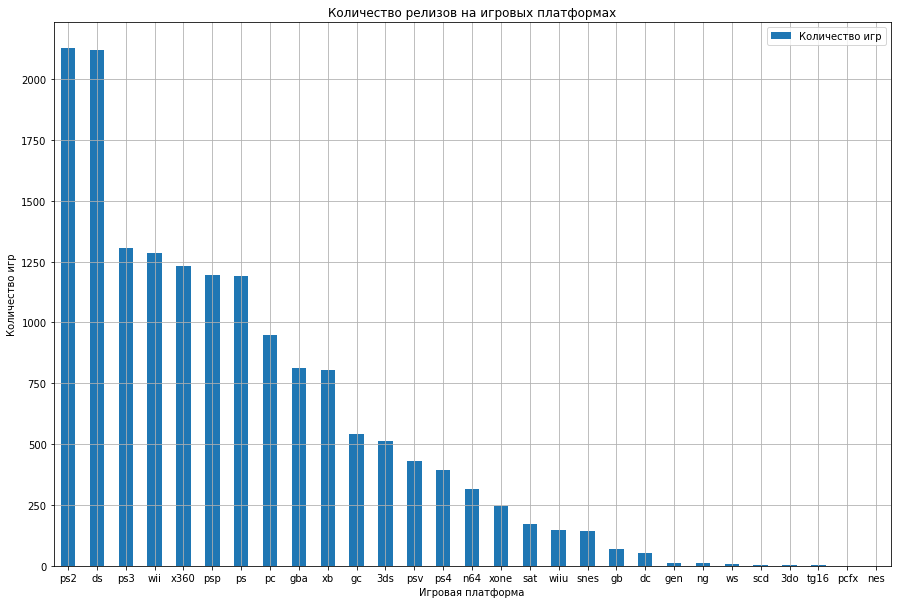

In [36]:
top_platform.sort_values(by='name', ascending=False).plot(
    x='platform', 
    kind='bar', 
    figsize=(15, 10), 
    grid=True,
    title = 'Количество релизов на игровых платформах'
)
plt.legend(['Количество игр'])
plt.xticks(rotation=0)
plt.xlabel('Игровая платформа')
plt.ylabel('Количество игр')
plt.show()

**Больше всего релизов на PlayStation 2, но и Nintendo DS почти не отстает. В топ-5 также входят PlayStation 3, Nintendo Wii и Xbox 360.**

In [37]:
top_platform_sales = df_new.groupby('platform').agg({'sum_sales':'sum'}).reset_index()
top_platform_sales.sort_values(by='sum_sales', ascending=False).head()

,platform,sum_sales
14,ps2,1233.56
26,x360,961.24
15,ps3,931.33
23,wii,891.18
3,ds,802.76


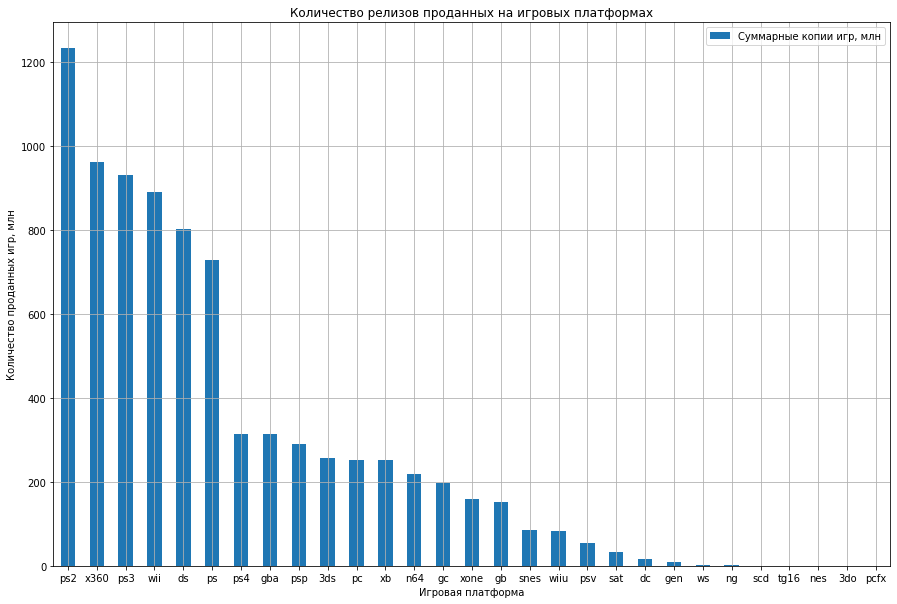

In [38]:
top_platform_sales.sort_values(by='sum_sales', ascending=False).plot(
    x='platform', 
    kind='bar', 
    figsize=(15, 10), 
    grid=True,
    title = 'Количество релизов проданных на игровых платформах'
)
plt.legend(['Суммарные копии игр, млн'])
plt.xticks(rotation=0)
plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных игр, млн')
plt.show()

**По количеству проданных копий игр сохранился тот же топ-5, что и по количеству игр, что логично - чем больше игр выпускаешь, тем больше копий продается. По прежнему выигрывает PlayStation 2, причем с приличным отрывом, далее идут Xbox 360 и PlayStation 3, замыкают топ консоли Nintendo - DS и Wii.**

#### Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

In [39]:
life_time = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
life_time.set_axis(['platform', 'first_year', 'last_year'], axis='columns', inplace=True)
life_time['length'] = life_time['last_year'] - life_time['first_year']
print(life_time.sort_values(by='length', ascending=False).reset_index())

    index platform  first_year  last_year  length
0      13       pc        1985       2016      31
1       4       ds        1985       2013      28
2       5       gb        1988       2001      13
3      28     x360        2005       2016      11
4      19      psp        2004       2015      11
5      16      ps2        2000       2011      11
6      11      nes        1983       1994      11
7       3       dc        1998       2008      10
8      25      wii        2006       2016      10
9      17      ps3        2006       2016      10
10      0     2600        1980       1989       9
11     23     snes        1990       1999       9
12     15       ps        1994       2003       9
13     29       xb        2000       2008       8
14      6      gba        2000       2007       7
15      7       gc        2001       2007       6
16     10      n64        1996       2002       6
17      2      3ds        2011       2016       5
18     20      psv        2011       2016       5


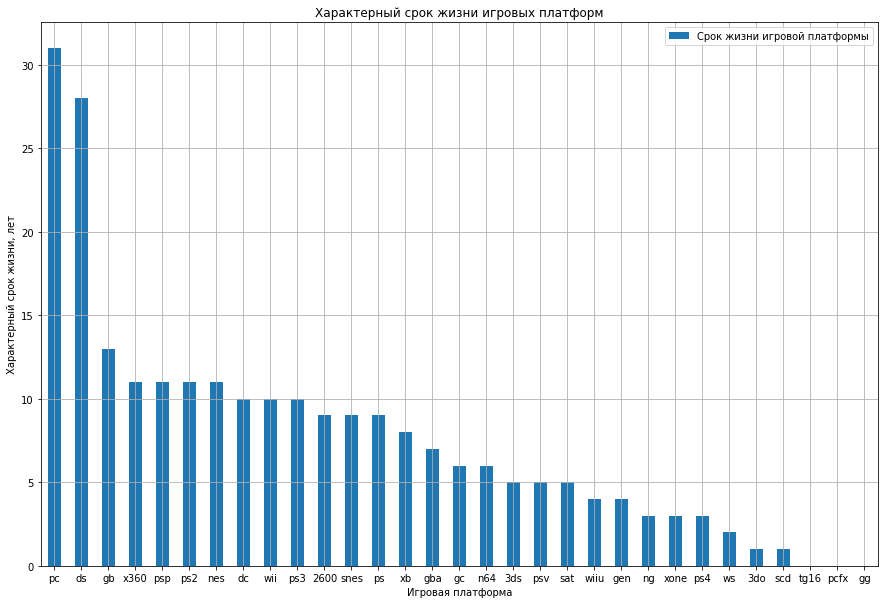

In [40]:
life_time.sort_values(by='length', ascending=False).plot(
    x='platform', 
    y='length',
    kind='bar', 
    figsize=(15, 10), 
    grid=True,
    title = 'Характерный срок жизни игровых платформ'
)
plt.legend(['Срок жизни игровой платформы'])
plt.xticks(rotation=0)
plt.xlabel('Игровая платформа')
plt.ylabel('Характерный срок жизни, лет')
plt.show()

**Самая "живучая" платформа для игр - PC (Персональный компьютер), что неудивительно, ведь компьютер всегда можно проапгрейдить и дальше играть в новенькие игры, тогда как некоторые консоли со временем морально устаревают. Из консолей до 2016 года дотянули PlayStation 3, 4 и Vita, Xbox 360 и One,  Nintendo 3DS, Wii и Wiiu.**

#### Посмотрим, какие платформы лидируют по продажам, растут или падают.

**Составим сводную таблицу по количеству релизов игр в год для каждой платформы.**

In [41]:
platform_releases = df_new.pivot_table(index='platform', 
                                      values='sum_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'count', 
                                      fill_value=0, 
                                      margins=True).reset_index()
platform_releases = platform_releases[:-1]

**Будем рассматривать те платформы, где за все годы вышло более 100 игр.**

In [42]:
platform_releases = platform_releases.query('All > 100').set_index('platform')

In [43]:
platform_releases = platform_releases.sort_values(by='All', ascending=False).reset_index()

**Получили сводную таблицу, где видим, в какие годы та или иная платформа имела наибольшее число релизов. Прежде, чем строить график, сделаем все то же самое, что и выше, только посчитаем не количество, а суммарные продажи всех игр на платформах.**

In [44]:
pd.set_option('display.max_columns', None)
platform_releases

year_of_release,platform,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,ps2,0,0,0,0,0,0,82,185,280,256,259,260,259,214,191,96,38,7,0,0,0,0,0,2127
1,ds,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2120
2,ps3,0,0,0,0,0,0,0,0,0,0,0,0,27,90,138,162,181,215,147,126,108,73,38,1305
3,wii,0,0,0,0,0,0,0,0,0,0,0,0,44,185,282,325,253,143,31,12,6,4,1,1286
4,x360,0,0,0,0,0,0,0,0,0,0,0,18,93,123,146,172,182,206,106,75,63,35,13,1232
5,psp,0,0,0,0,0,0,0,0,0,0,15,95,189,133,100,161,188,139,106,54,10,3,0,1193
6,ps,17,99,164,188,248,200,160,91,20,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1190
7,pc,6,2,4,6,8,7,7,15,19,33,30,37,52,62,76,107,90,139,61,38,47,50,54,950
8,gba,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
9,xb,0,0,0,0,0,0,1,33,158,189,177,179,62,3,1,0,0,0,0,0,0,0,0,803


In [45]:
# топ платформ по количеству выпущенных игр
platforms_top_releases = list(platform_releases.sort_values(by='All', ascending=False)['platform'].head(10))

**Составим сводную таблицу по сумме продаж копий игр в год для каждой платформы.**

In [46]:
platform_sales = df_new.pivot_table(index='platform', 
                                      values='sum_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum', 
                                      fill_value=0, 
                                      margins=True).reset_index()
platform_sales = platform_sales[:-1]

**Будем рассматривать те платформы, где за все годы было продано более 50 млн копий игр.**

In [47]:
platform_sales = platform_sales.query('All > 50').set_index('platform')

In [48]:
platform_sales = platform_sales.sort_values(by='All', ascending=False).reset_index()

**Получили сводную таблицу, где видим, в какие годы та или иная платформа имела наибольшее продажи игр.**

In [49]:
pd.set_option('display.max_columns', None)
platform_sales

year_of_release,platform,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,ps2,0.00,0.00,0.00,0.00,0.00,0.00,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
1,x360,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
2,ps3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60,931.33
3,wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
4,ds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.76
5,ps,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,727.58
6,ps4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
7,gba,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
8,psp,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53
9,3ds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81


In [50]:
# топ платформ по количеству проданных копий игр
platforms_top_sales = list(platform_sales.sort_values(by='All', ascending=False)['platform'].head(10))

**Списки топовых по продажам и по релизам платформ почти полностью совпадают. Объединим их в один общий топ платформ, и построим графики - как выходили и продавались игры по годам.**

In [51]:
top_platforms = list(set(platforms_top_releases + platforms_top_sales))

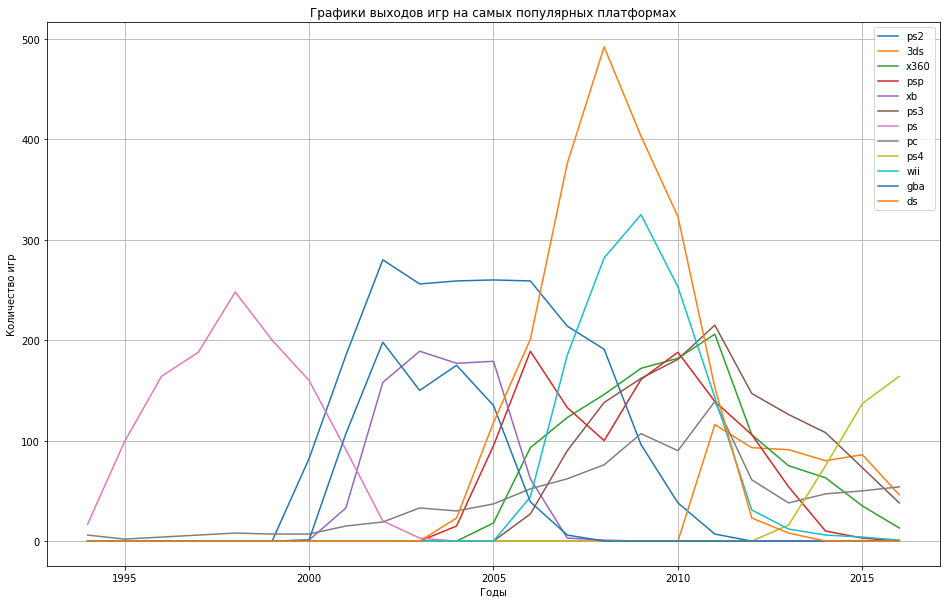

In [52]:
plt.figure(figsize=(16, 10))
for i in top_platforms:
    plt.plot(platform_releases.loc[platform_releases['platform'] == i, list(platform_releases.columns[1:-1])].T, label=i)
plt.title('Графики выходов игр на самых популярных платформах')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.grid()
plt.legend(loc='upper right')
plt.show()

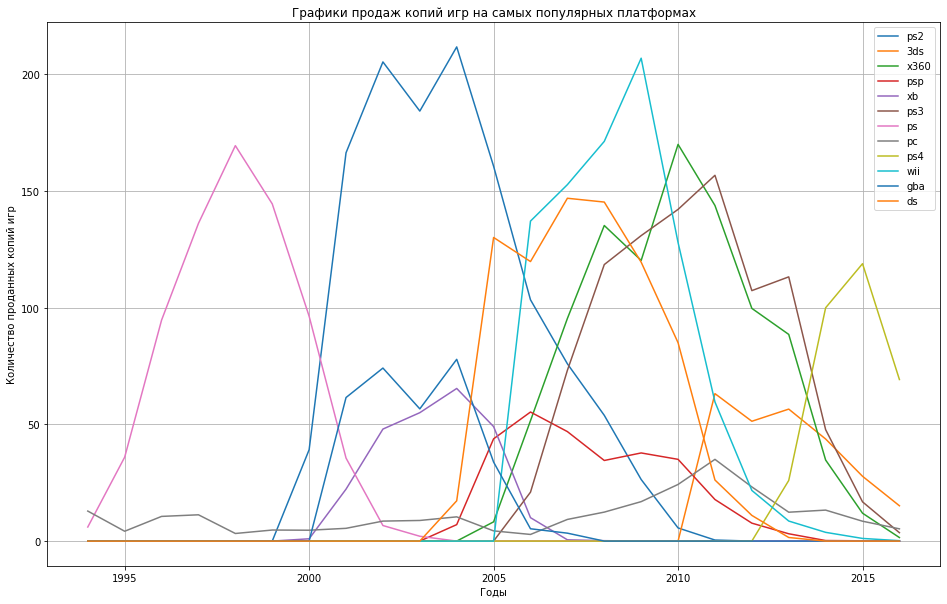

In [53]:
plt.figure(figsize=(16, 10))
for i in top_platforms:
    plt.plot(platform_sales.loc[platform_sales['platform'] == i, list(platform_sales.columns[1:-1])].T, label=i)
plt.title('Графики продаж копий игр на самых популярных платформах')
plt.xlabel('Годы')
plt.ylabel('Количество проданных копий игр')
plt.grid()
plt.legend(loc='upper right')
plt.show()

**Можно увидеть, что формы графиков продаж и релизов игр похожи для каждой платформы, что логично - чем больше выпускаешь игры, тем больше продажи.**

**Второе наблюдение - несмотря на то, что PlayStation 2 лидирует в обоих топах, начиная с 2012 года новых релизов, а соответственно и продаж на данной платформе нет. Та же ситуация и с другими консолями (Nintendo, Xbox) - когда выходит новое поколение консоли, все новые релизы игр стараются сосредоточиться именно на эксклюзивах для новых платформ, тогда как старые консоли потихоньку уходят в историю. Исключение - PC (персональный компьютер), который стабильно из года в год радует релизами игроков, но при этом объемов продаж меньше, чем у консолей.**

**Из второго наблюдения вытекает третье - для дальнейшего исследования необходимо выбрать те платформы, которые еще не отжили свое и которые наиболее актуальны в 2016 году. Для этого посмотрим недавно появившиеся платформы, найдем эти данные через таблицу `life_time`. Также посмотрим на те платформы, где в 2015-2016 годах были какие-нибудь релизы, для этого отсортируем нашу сводную таблицу `platform_sales` по 2016 году.**

In [54]:
life_time.query('last_year == 2016 and first_year > 2011')['platform']

18     ps4
26    wiiu
30    xone
Name: platform, dtype: object

In [55]:
platform_sales.sort_values(by=2016, ascending=False)[['platform', 
                                                      2011, 
                                                      2012, 
                                                      2013, 
                                                      2014, 
                                                      2015, 
                                                      2016]].head(10).set_index('platform')

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
ps4,0.00,0.00,25.99,100.00,118.90,69.25
xone,0.00,0.00,18.96,54.07,60.14,26.15
3ds,63.20,51.36,56.57,43.76,27.78,15.14
pc,35.03,23.22,12.38,13.28,8.52,5.25
wiiu,0.00,17.56,21.65,22.03,16.35,4.60
psv,4.63,16.19,10.59,11.90,6.25,4.25
ps3,156.78,107.35,113.25,47.76,16.82,3.60
x360,143.84,99.74,88.58,34.74,11.96,1.52
wii,59.65,21.71,8.59,3.75,1.14,0.18


**Из всех этих данных в видно, что PlayStation 4, WiiU, XBox One находятся на подъеме, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, Wii и PS отжили свое, а PC (персональные компьютеры) стабильно держатся на плаву.**

Для дальнейшего анализа оставим наиболее перспективные платформы - PlayStation 4, WiiU, XBox One, PC, оставим еще Nintendo 3DS и PS Vita и будем опираться на данные с 2012 года, как наиболее актуальные:

- PlayStation 4 - дата выхода 15 ноября 2013.

- WiiU - дата выхода 18 ноября 2012.

- XBox One - дата выхода 22 ноября 2013.

- Nintendo 3DS - дата выхода 26 февраля 2011.

- PS Vita - дата выхода 17 декабря 2011.

In [56]:
df_new_platform = df_new.query('platform in ["ps4", "wiiu", "xone", "pc", "3ds", "psv"] and year_of_release > 2011')

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по выбранным актуальным платформам. 

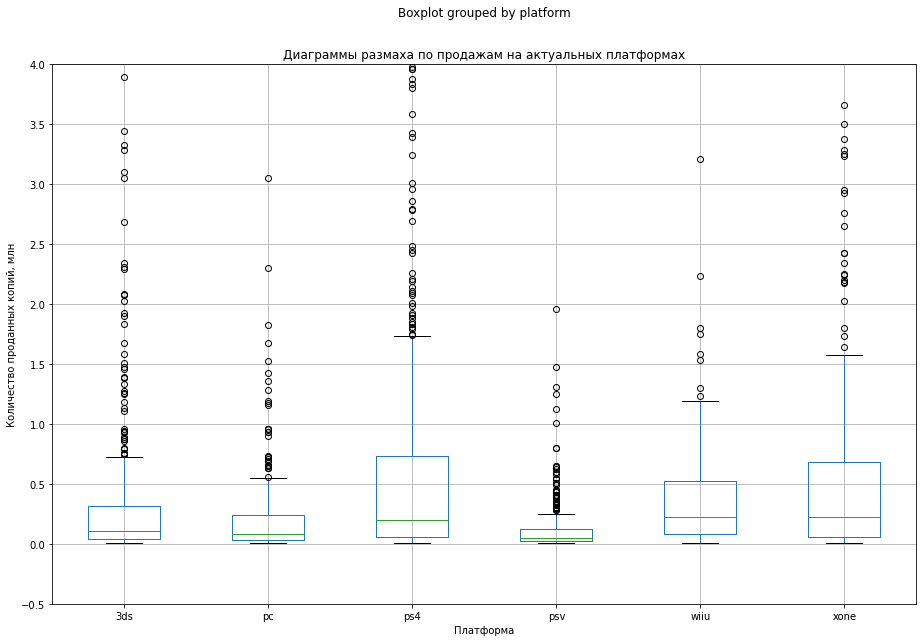

In [57]:
(
    df_new_platform.query('platform in ["ps4", "wiiu", "xone", "pc", "3ds", "psv"]')[['platform', 'name', 'sum_sales']]
    .boxplot(column='sum_sales', by='platform', figsize=(15,10))
)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(-0.5, 4)
plt.show()

В табличном варианте диаграмма размаха будет выглядеть так:

In [58]:
(
    df_new_platform.query('platform in ["ps4", "wiiu", "xone", "pc", "3ds", "psv"]')
    .pivot_table(index='platform', values='sum_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
    .reset_index().droplevel(1, axis=1)
)

,platform,sum,mean,median,std,count
0,3ds,194.61,0.491439,0.11,1.387161,396
1,pc,62.65,0.250600,0.08,0.494640,250
2,ps4,314.14,0.801378,0.20,1.609456,392
3,psv,49.18,0.119659,0.05,0.203011,411
4,wiiu,82.19,0.559116,0.22,1.058836,147
5,xone,159.32,0.645020,0.22,1.036139,247


**Лидерами продаж являются PlayStation 4 и Xbox One. ПК и PS Vita являются непопулярными платформами, но при этом и самыми стабильными - размах самый узкий.**

**Среднее число продаж игр для ПК самое низкое и доля бестселлеров самая маленькая.**

**Медианные продажи по каждой из платформ заметно меньше 1 млн, но выбросы показывают, что у каждой из платформ случаются супер-хиты (так назваемые ААА проекты), приносящие миллионы - доля таких успешных проектов выше всего у PlayStation 4 и Xbox One.**

**Выбросы на боксплотах - это какие-то суперопулярные игры. Сравним 3DS и Xbox One. У первого маленький ящик и много выбросов. Это говорит о том, что больше всего продаж делается за счет этих выбросов. В то же время у Xbox One ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на Xbox One покупают самые разные игры, причем, в немалом количестве.**

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

**Рассмотрим популярную платформу PlayStation 4.**

In [59]:
df_new_platform_ps4_critics = df_new_platform.query('platform == "ps4" and critic_score > 0')

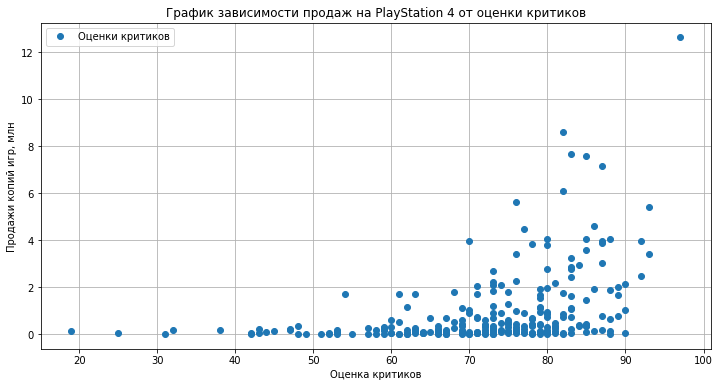

In [60]:
df_new_platform_ps4_critics.plot(
    x='critic_score',
    y='sum_sales',
    style='o',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости продаж на PlayStation 4 от оценки критиков'
)
plt.legend(['Оценки критиков'])
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи копий игр, млн')
plt.show()

In [61]:
df_new_platform_ps4_users = df_new_platform.query('platform == "ps4" and user_score >= 0')

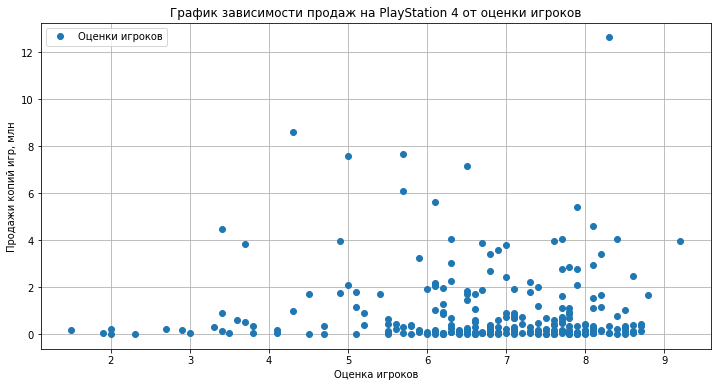

In [62]:
df_new_platform_ps4_users.plot(
    x='user_score',
    y='sum_sales',
    style='o',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости продаж на PlayStation 4 от оценки игроков'
)
plt.legend(['Оценки игроков'])
plt.xlabel('Оценка игроков')
plt.ylabel('Продажи копий игр, млн')
plt.show()

In [63]:
print('Корреляция продаж игр в зависимости от оценки критиков:', df_new_platform_ps4_critics['sum_sales']
      .corr(df_new_platform_ps4_critics['critic_score']))
print('Корреляция продаж игр в зависимости от оценки игроков:', df_new_platform_ps4_users['sum_sales']
      .corr(df_new_platform_ps4_users['user_score']))
print('Корреляция оценки критиков и оценки игроков:', df_new_platform_ps4_critics['critic_score']
      .corr(df_new_platform_ps4_users['user_score']))

Корреляция продаж игр в зависимости от оценки критиков: 0.406567902061781
Корреляция продаж игр в зависимости от оценки игроков: -0.031957110204556376
Корреляция оценки критиков и оценки игроков: 0.5576539782764632


**В целом видно, что чем выше оценка критиков, тем продажи выше, значение корреляции в данном случае положительное, значит есть связь, но она слабая. Связь с оценкой игроков вообще вышла отрицательной и близкой к нулю, что говорит о том, что тут связи с продажами практически нет.**

**Корреляция оценок критиков и игроков положительная и стремится к единице, связь есть, хоть и не самая явная. Это говорит о том, что иногда и критики и игроки одинаково ставят высокие или низкие оценки игре, а иногда их мнения очень сильно расходятся.**

**При прогнозе продаж немного надежнее полагаться на отзывы критиков.**

**Рассмотрим персональный компьютер PC.**

In [64]:
df_new_platform_pc_critic = df_new_platform.query('platform == "pc" and critic_score > 0')

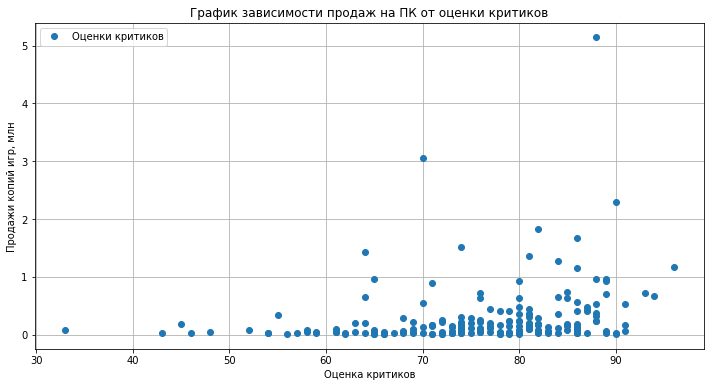

In [65]:
df_new_platform_pc_critic.plot(
    x='critic_score',
    y='sum_sales',
    style='o',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости продаж на ПК от оценки критиков'
)
plt.legend(['Оценки критиков'])
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи копий игр, млн')
plt.show()

In [66]:
df_new_platform_pc_users = df_new_platform.query('platform == "pc" and user_score >= 0')

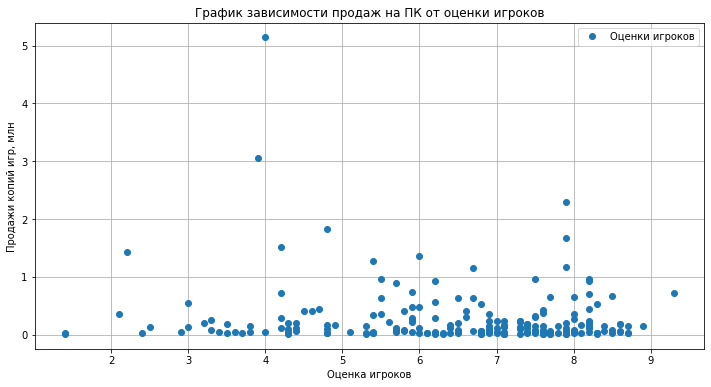

In [67]:
df_new_platform_pc_users.plot(
    x='user_score',
    y='sum_sales',
    style='o',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости продаж на ПК от оценки игроков'
)
plt.legend(['Оценки игроков'])
plt.xlabel('Оценка игроков')
plt.ylabel('Продажи копий игр, млн')
plt.show()

In [68]:
print('Корреляция продаж игр в зависимости от оценки критиков:', df_new_platform_pc_critic['sum_sales']
      .corr(df_new_platform_pc_critic['critic_score']))
print('Корреляция продаж игр в зависимости от оценки игроков:', df_new_platform_pc_users['sum_sales']
      .corr(df_new_platform_pc_users['user_score']))
print('Корреляция оценки критиков и оценки игроков:', df_new_platform_pc_critic['critic_score']
      .corr(df_new_platform_pc_users['user_score']))

Корреляция продаж игр в зависимости от оценки критиков: 0.23724324311567918
Корреляция продаж игр в зависимости от оценки игроков: -0.12186747630735577
Корреляция оценки критиков и оценки игроков: 0.4325873064924276


**В целом все также, как и на PlayStation 4 - чем выше оценка критиков, тем продажи выше, значение корреляции в данном случае положительное, значит есть связь, но она слабая. Это также подтверждает следующий пример: возьмем и посмотрим на крупные релизы, проданные более 3 млн копий на ПК**

In [69]:
df_new_platform_pc_critic.query('sum_sales > 3')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
192,diablo iii,pc,2012,role-playing,2.44,2.16,0.0,0.54,88,4.0,m,5.14
458,the sims 4,pc,2014,simulation,1.00,1.82,0.0,0.23,70,3.9,t,3.05


**Видим интересную картину - Diablo 3 и The Sims 4 продались большими числами копий (5.14 и 3.05 млн соответственно), при этом у обоих хорошие оценки критиков (88 и 70), но вот оценки игроков заметно хуже (4.0 и 3.9). Поэтому подтверждаем ранее сделанный вывод - `при прогнозе продаж надежнее полагаться на отзывы критиков`.**

In [70]:
for k in ["xone", "wiiu", "3ds", "psv"]:
    print(k)
    df_platforms_critics = df_new_platform.query('platform == @k and critic_score > 0')
    print('Корреляция между оценкой критиков и продажами:', df_platforms_critics['critic_score'].corr(df_platforms_critics['sum_sales']))
    df_platforms_users = df_new_platform.query('platform == @k and user_score >= 0')
    print('Корреляция между оценкой пользователей и продажами:', df_platforms_users['user_score'].corr(df_platforms_users['sum_sales']))
    print('Корреляция между оценками критиков и пользователей:', df_platforms_critics['critic_score'].corr(df_platforms_users['user_score']))
    print()

xone
Корреляция между оценкой критиков и продажами: 0.4169983280084017
Корреляция между оценкой пользователей и продажами: -0.06892505328279414
Корреляция между оценками критиков и пользователей: 0.4724621124165801

wiiu
Корреляция между оценкой критиков и продажами: 0.34837976012017485
Корреляция между оценкой пользователей и продажами: 0.4002190202148617
Корреляция между оценками критиков и пользователей: 0.7700795968080212

3ds
Корреляция между оценкой критиков и продажами: 0.3208028695360785
Корреляция между оценкой пользователей и продажами: 0.19758263411038599
Корреляция между оценками критиков и пользователей: 0.7227622474404906

psv
Корреляция между оценкой критиков и продажами: 0.0944878992931617
Корреляция между оценкой пользователей и продажами: -0.004339437514314869
Корреляция между оценками критиков и пользователей: 0.6991991330087624



**Видим, что для Xbox One тенденция сохраняется такая же, как и для PS4 или ПК - чем выше оценка критиков, тем продажи выше, значение корреляции в данном случае положительное, значит есть связь, но она слабая. Оценка игроков коррелирует около нуля.**

**В случае с WiiU корреляция оценки пользователей оказалась даже больше оценки критиков.**

**3DS и PS Vita оценки критиков и пользователей коррелируют практически одинаково - значение корреляции положительное, есть связь, но также слабая.**

#### Посмотрим на общее распределение игр по жанрам.

In [71]:
popular_genre = df_new_platform.groupby('genre').agg({'name':'count'}).reset_index()
popular_genre.sort_values(by='name', ascending=False).reset_index()

,index,genre,name
0,0,action,660
1,7,role-playing,262
2,1,adventure,187
3,10,sports,142
4,8,shooter,136
5,3,misc,129
6,6,racing,72
7,4,platform,64
8,9,simulation,57
9,2,fighting,56


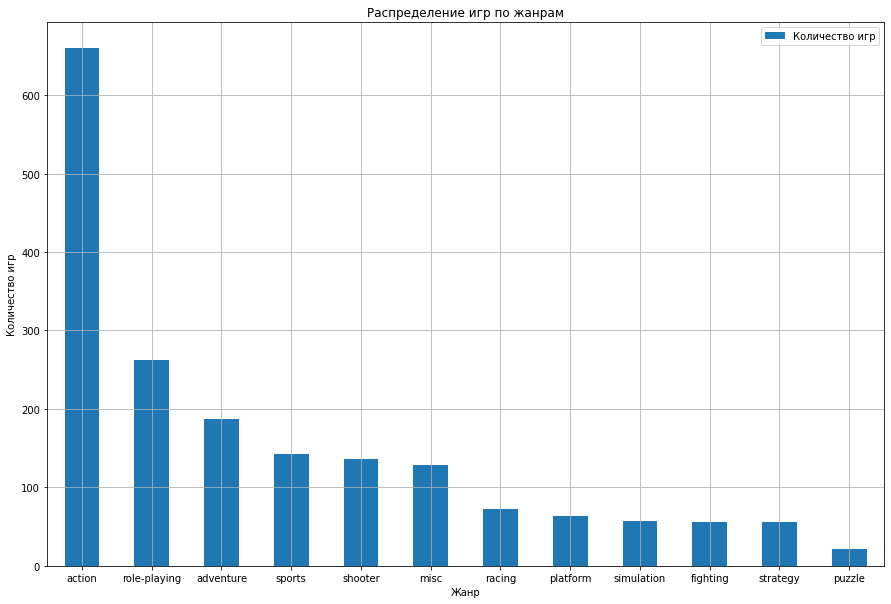

In [72]:
popular_genre.sort_values(by='name', ascending=False).plot(
    x='genre', 
    kind='bar', 
    figsize=(15, 10), 
    grid=True,
    title = 'Распределение игр по жанрам'
)
plt.legend(['Количество игр'])
plt.xticks(rotation=0)
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

**Больше всего выпускают игры в жанре *action*. В топ-5 также входят *RPG*, *adventure*, *sports* и *shooter*.**

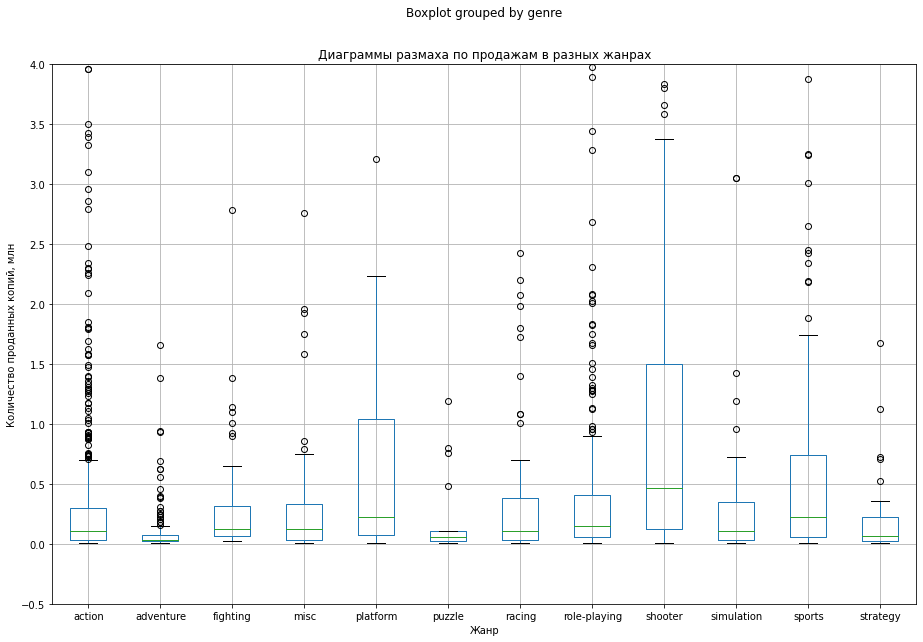

In [73]:
(
    df_new_platform[['sum_sales', 'genre']]
    .boxplot(column='sum_sales', by='genre', figsize=(15,10))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(-0.5, 4)
plt.show()

In [74]:
(
    df_new_platform
    .pivot_table(index='genre', values='sum_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
    .reset_index().sort_values(('median', 'sum_sales'), ascending=False)
)

,genre,sum,mean,median,std,count
,,sum_sales,sum_sales,sum_sales,sum_sales,sum_sales
8,shooter,171.64,1.262059,0.465,2.008596,136
4,platform,51.66,0.807188,0.225,1.535765,64
10,sports,96.21,0.677535,0.220,1.254101,142
7,role-playing,147.43,0.562710,0.150,1.453253,262
2,fighting,28.16,0.502857,0.120,1.228270,56
3,misc,42.58,0.330078,0.120,0.654890,129
9,simulation,31.32,0.549474,0.110,1.460980,57
6,racing,33.52,0.465556,0.110,0.983376,72
0,action,227.44,0.344606,0.105,0.816247,660


**Из этих данных видно, что игры в жанре *action* лидеры по количеству релизов, но по медианым показателям продаж даже не входят в пятерку, игры в жанре *shooter* в лидерах и по средним и по медианным продажам. Также среди лидеров спортивные игры (*sports*) и платформеры (*platform*).**

**Выводы по исследовательскому анализу данных:**

1. Самая "живучая" платформа для игр - PC (Персональный компьютер), из консолей до 2016 года дотянули PlayStation 3, 4 и Vita, Xbox 360 и One, Nintendo 3DS, Wii и Wiiu.

2. Пик продаж игр на различные платформы пришелся на 2008 и 2009 года.

3. В среднем живучесть одной платформы составляет 7-8 лет.

4. При прогнозе продаж надежнее полагаться на оценки критиков, чем на оценки игроков.

5. Игры в жанре *action* лидеры по количеству релизов, но по продажам выигрывают игры в жанре *shooter*. Также среди лидеров спортивные игры (*sports*) и платформеры (*platform*).

<a id=5></a>
### Составим портрет пользователя каждого региона.

#### Посмотрим какие платформы предпочитают в разных регионах.

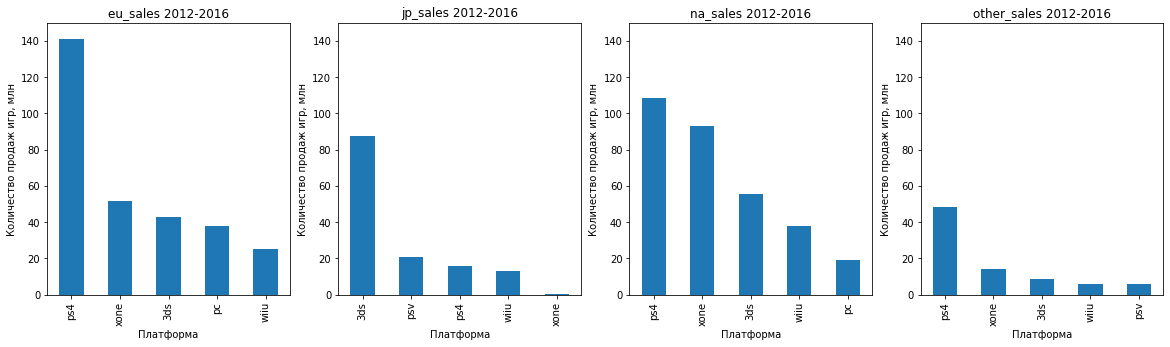

In [75]:
#создадим сводную таблицу, где рассчитаем продажи по каждой платформе
region_platform=(df_new_platform.pivot_table(index='platform',
                                             values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales'), 
                                             aggfunc='sum'));

#выведем на печать топ 5 платформ по продажам для каждого региона
plt.figure(figsize=(20, 5))
for i, reg in enumerate(region_platform.columns, 1):
    plt.subplot(1, 4, i)
    (region_platform[reg].sort_values(ascending=False).head(5).plot(
        kind='bar', 
        title=reg+' 2012-2016', 
        x=plt.gca(),
        ylim=(0,150))
    )
    plt.ylabel('Количество продаж игр, млн')
    plt.xlabel('Платформа')

**Интересно, что на родине Xbox One в Северной Америке лидирует PlayStation 4, возможно Xbox One не хватает топовых релизов. По той же причине, возможно, PS 4  лидирует и в Европе и в других странах, кроме Японии. А вот на своей родине в Японии PlayStation 4 лишь на 3 месте и особенно сильно уступает портативной 3ds. Видимо японцам важна мобильность игрового устройства, чтобы играть по дороге на работу или при поездках в метро.**

#### Посмотрим, какие самые популярные жанры игр в разных регионах.

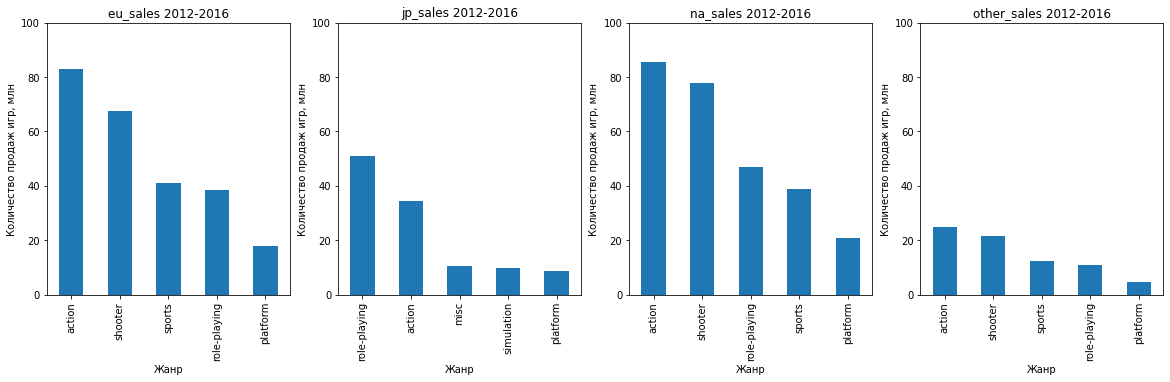

In [76]:
#создадим сводную таблицу, где рассчитаем продажи по каждому жанру
region_genre=(df_new_platform.pivot_table(index='genre',
                                          values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales'), 
                                          aggfunc='sum'));

#выведем на печать топ 5 жанров по продажам для каждого региона
plt.figure(figsize=(20, 5))
for i, reg in enumerate(region_genre.columns, 1):
    plt.subplot(1, 4, i)
    (region_genre[reg].sort_values(ascending=False).head(5).plot(
        kind='bar', 
        title=reg+' 2012-2016', 
        x=plt.gca(),
        ylim=(0,100))
    )
    plt.ylabel('Количество продаж игр, млн')
    plt.xlabel('Жанр')

**Пока весь мир играет в экшены и шутеры, японцы предпочитают играть в RPG. И не удивительно, что доля RPG у них выше - в топ-5 по продажам RPG игр - 3 игры для 3ds, которая, как мы помним, во много раз превосходила все остальные платформы в Японии.**

In [77]:
df_new_platform.query('genre == "role-playing" and sum_sales > 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,0,-1.0,indefined,14.60
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,0,-1.0,indefined,11.68
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87,6.5,m,7.17
108,pokemon sun/moon,3ds,2016,role-playing,2.98,1.45,2.26,0.45,0,-1.0,indefined,7.14
192,diablo iii,pc,2012,role-playing,2.44,2.16,0.00,0.54,88,4.0,m,5.14


#### Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

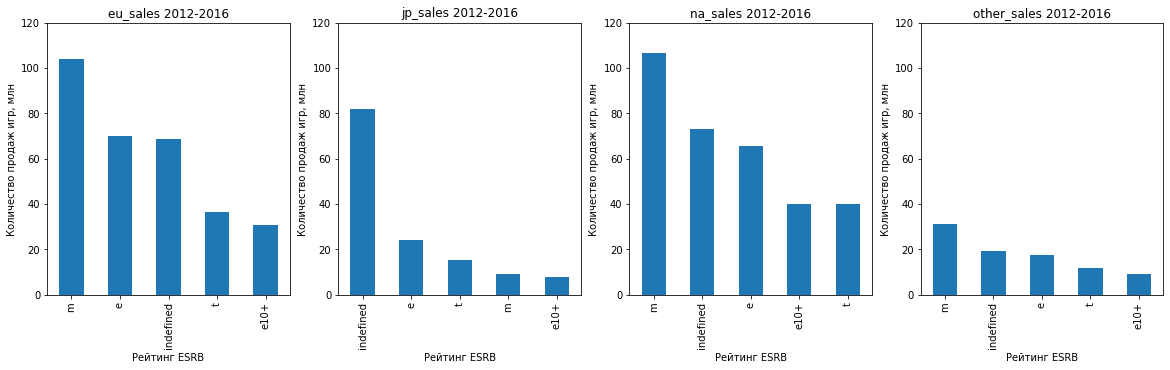

In [78]:
#создадим сводную таблицу, где рассчитаем продажи по рейтингу ESRB
region_rating=(df_new_platform.pivot_table(index='rating', 
                                           values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales'), 
                                           aggfunc='sum'));

#выведем на печать топ 5 обозначений рейтинга по продажам для каждого региона
plt.figure(figsize=(20, 5))
for i, reg in enumerate(region_rating.columns, 1):
    plt.subplot(1, 4, i)
    (region_rating[reg].sort_values(ascending=False).head(5).plot(
        kind='bar', 
        title=reg+' 2012-2016', 
        x=plt.gca(),
        ylim=(0,120))
    )
    plt.ylabel('Количество продаж игр, млн')
    plt.xlabel('Рейтинг ESRB')

**В Северной Америке и Европе наиболее часто попадается рейтинг M - «Для взрослых»: материалы игры не подходят для лиц младше 17 лет. Это логично, так как самые популярные жанры в этих регионах экшен и шутер, а там перестрелки и убийства.**

**В Японии наиболее часто можно встретить игры без рейтинга ESRB, скорее всего это игры локального происхождения, а рейтинг ESRB присуждается в основном играм в Америке и Канаде. Также в Японии встречаются рейтинги E (Для всех) и T (для подростков от 13 лет).**

**Составим портрет пользователей каждого региона:**

- Игроки Северной Америки и Европы предпочитают платформы PlayStation 4 и Xbox One, игры жанра экшн, шутер, RPG и спорт, с рейтингом M (для взрослых с 17 лет) и Е (для всех).

- Игроки Японии предпочитают портативные консоли Nintendo 3ds и PS Vita, игры жанра RPG и экшн, а также различные симуляторы и платформеры, без определенного рейтинга, либо с рейтингом Е и Т (для подростков от 13 лет).

<a id=6></a>
### Проверим гипотезы

#### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- H0 (нулевая гипотеза): средний пользовательский рейтинг платформ Xbox One и PC одинаковый.

- H1 (альтернативная гипотеза): средний пользовательский рейтинг платформ Xbox One и PC разный.

Сравним средние двух генеральных совокупностей t-тестом. Создадим выборки `df_xone` и `df_pc` - значения рейтинга пользователей для Xbox One и PC соответственно.

In [79]:
df_xone = df_new_platform[(df_new_platform['platform'] == 'xone') & (df_new_platform['user_score'] > 0)]['user_score']
df_pc = df_new_platform[(df_new_platform['platform'] == 'pc') & (df_new_platform['user_score'] > 0)]['user_score']

In [80]:
alpha = 0.05

results_1 = st.ttest_ind(df_xone, df_pc)

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: рейтинг платформы Xbox One не равен рейтингу PC')
else:
    print('Не получилось отвергнуть нулевую гипотезу: рейтинг платформы Xbox One и PC равны')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу: рейтинг платформы Xbox One и PC равны


**Значение p-value показывает: вероятность случайно получить такое или большее различие равна 55.4%, хотя средние значения рейтинга из разных выборок и не одинаковы. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними значениями. Поэтому говорим, что при статистической вероятности 5% не отвергаем нулевую гипотезу, а значит средний пользовательский рейтинг платформ Xbox One и PC одинаковый.**

#### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

- H0 (нулевая гипотеза): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

- H1 (альтернативная гипотеза): Средние пользовательские рейтинги жанров Action и Sports разные.

Сравним средние двух генеральных совокупностей t-тестом. Создадим выборки `df_action` и `df_sports` - значения рейтинга пользователей для жанров Action и Sports соответственно.

In [81]:
df_action = df_new_platform[(df_new_platform['genre'] == 'action') & (df_new_platform['user_score'] > 0)]['user_score']
df_sports = df_new_platform[(df_new_platform['genre'] == 'sports') & (df_new_platform['user_score'] > 0)]['user_score']

In [82]:
alpha = 0.05

results_3 = st.ttest_ind(df_action, df_sports)

print('p-значение:', results_3.pvalue)

if (results_3.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые')

p-значение: 1.5803817191757584e-14
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные


**Значение p-value показывает: вероятность случайно получить такое или большее различие равна 1.5803817191757584e-14, хотя средние значения рейтинга из разных выборок и не одинаковы. Это явно слишком маленькая вероятность, чтобы делать вывод о значимом сходстве между средними значениями. Поэтому говорим, что при статистической вероятности 5% отвергаем нулевую гипотезу, а значит средний пользовательский рейтинг жанров Action и Sports разный.**

**Проверим, правда ли средний рейтинг жанра Action больше рейтинга Sports.**

- H0 (нулевая гипотеза): Средние пользовательские рейтинги жанра Action равны рейтингам Sports.

- H1 (альтернативная гипотеза): Средние пользовательские рейтинги жанра Action больше рейтинга Sports.

In [83]:
print('Средний рейтинг пользователей жанра Action:', df_action.mean())
print('Средний рейтинг пользователей жанра Sports:', df_sports.mean())

Средний рейтинг пользователей жанра Action: 6.88753709198813
Средний рейтинг пользователей жанра Sports: 5.658928571428571


In [84]:
alpha = 0.05

results_4 = st.ttest_ind(
    df_action, 
    df_sports,
    equal_var=False,
    alternative='greater') # альтернативная гипотеза больше предполагаемой

print('p-значение:', results_4.pvalue)

if (results_4.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанра Action больше рейтинга Sports')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги жанра Action равны рейтингам Sports')

p-значение: 9.851204037606914e-12
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанра Action больше рейтинга Sports


**Таким образом, получаем, что рейтинги жанров Action и Sports и вправду разные, причем рейтинг игр жанра Action больше рейтинга Sports.**

**Выводы:оценки пользователей не зависят от платформ, но зависят от жанров игр.**

<a id=7></a>
### Общий вывод

На анализ была представлена таблица `games.csv`. Была проведена предобработка данных, удалены или заполнены пропуски в данных, удалены дубликаты, изменены типы данных, а также добавлены необходимые для исследования новые столбцы.

**В данной таблице были изучены и описаны следующие параметры:**

1. Сколько игр выпускалось в разные годы - в 1996 году произошел скачок по продажам игр более чем в 2 раза, по сравнению с 1995 годом. Наибольший пик продаж пришелся на 2008 и 2009 года.

2. PlayStation 4, WiiU, XBox One находятся на подъеме, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, ПК и PS Vita являются непопулярными платформами, но при этом и самыми стабильными.

3. Стоить обратить внимание на то, что у PlayStation 4 одни из самых больших объемов продаж в Северной Америке, Европе и других странах, кроме Японии, на втором месте Xbox One. Игроделам стоит сосредоточить свое внимание именно на этих платформах в этих регионах. А вот в Японии популярны мобильные платформы - 3ds и PS Vita. 

4. Игры в жанре *action* лидеры по количеству релизов, но по продажам выигрывают игры в жанре *shooter*. Также среди лидеров спортивные игры (*sports*) и платформеры (*platform*) - для увеличения объемов продаж игроделам стоит обратить внимание на эти жанры.

5. Оценки пользователей не зависят от игровых платформ, но зависят от жанров игр.

6. Так как рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки, заметнее его влияние в этом регионе и Европе. Тут предпочитают игры с рейтингом M (для взрослых с 17 лет) и Е (для всех). В Японии популярны игры вовсе без рейтинга - судя по всему, это игры, созданные локально в самой Японии и в данном регионе есть своя система оценки игр CERO.

7. При прогнозе продаж надежнее полагаться на оценки критиков, чем на оценки пользователей.

**Были составлены портреты пользователей по регионам:**

- Игроки Северной Америки и Европы предпочитают платформы PlayStation 4 и Xbox One, игры жанра экшн, шутер, RPG и спорт, с рейтингом M (для взрослых с 17 лет) и Е (для всех).

- Игроки Японии предпочитают портативные консоли Nintendo 3ds и PS Vita, игры жанра RPG и экшн, а также различные симуляторы и платформеры, без определенного рейтинга, либо с рейтингом Е и Т (для подростков от 13 лет).

**Таким образом получили следующие рекомендации к будущим релизам игр:**

- Для Северной Америки, Европы и других стран, кроме Японии: Игра должна быть на платформе PlayStation 4 или Xbox One, в жанре шутер, спорт или платформер, с рейтингом М или Е. И неплохо будет если критики поставят высокие оценки. В таком случае вероятно данная игра будет хитом продаж в этих регионах.

- Для Японии: Игра должна быть на платформе 3ds, PS Vita или PlayStation 4, в жанре RPG или экшн, с рейтингом ESRB E или Т или без этих рейтингов. И также неплохо будет, если критики оценят игру высокими баллами. Тогда мы тоже будем иметь дело с потенциальным хитом.